In [51]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon
import matplotlib as mpl
import csv

def plot_bar(data,color_list,if_save,save_path,x_label,y_label,y_lim,if_paired_test,if_p_corr = False):
    plt.figure(figsize=(2,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if if_paired_test:
        data = np.array(data)
        the_mean = np.mean(data,1)
        the_std = np.std(data,1,ddof = 1)/math.sqrt(np.size(data,1))
        plt.errorbar(range(np.size(data,0)),the_mean,yerr=the_std,ecolor='slategray',elinewidth=1,marker='.',mfc='slategray',\
    mec='slategray',mew=1,ms=1,alpha=1,capsize=5,capthick=3,color='slategray', linewidth=2)
        for j in range(np.size(data,1)):
            plt.plot(range(np.size(data,0)),data[:,j],color = 'slategray',linewidth = 1,alpha = 0.2)
        num_fly = np.size(data,0)
        data.tolist()
    else:
        num_fly = len(data)
        for i in range(num_fly):
            a = data[i]
            the_mean = np.mean(a)
            the_std = np.std(a,ddof = 1)/math.sqrt(len(a))
            plt.bar([i], the_mean, width=0.7,yerr = the_std,error_kw = {'ecolor' : '0.2', 'capsize' :3 },
                        alpha=0.7,facecolor = 'white',edgecolor=color_list[i],linewidth=1.5)
    p_list = []
    for i in range(num_fly-1):
        for j in range(i+1,num_fly):
            a = data[i]
            b = data[j]
            if if_paired_test:
                res = wilcoxon(a,b)
            else:
                res = mannwhitneyu(a,b)
            p = res.pvalue
            p_list.append(p)
    if if_p_corr:
        p_corrected = multipletests(p_list,method = 'fdr_bh')
        p_list = p_corrected[1]
    for i in range(len(p_list)):
        p = p_list[i]
        if p<0.05 and p>=0.01:
            plt.text(0.5*(i+1),np.mean(data[0]),'*',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.01 and p>0.001:
            plt.text(0.5*(i+1),np.mean(data[0]),'**',verticalalignment = 'center', horizontalalignment = 'center')
        elif p<0.001 and p>=0.0001:
            plt.text(0.5*(i+1),np.mean(data[0]),'***',verticalalignment = 'center', horizontalalignment = 'center') 
        elif p<0.0001:
            plt.text(0.5*(i+1),np.mean(data[0]),'****',verticalalignment = 'center', horizontalalignment = 'center') 
    p_result = []
    p_result.append(p_list)
    plt.xticks([0,1,2],x_label)
    plt.ylabel(y_label)
    plt.ylim(y_lim)
    if np.size(save_path)>0 and if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(save_path+'.pdf',bbox_inches = 'tight')
        plt.savefig(save_path+'.png',bbox_inches = 'tight')
        with open(save_path+'-p.csv', 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(p_result)
    plt.show()

In [52]:
data_path = '../results/nsyb-G7f-rAch1h/figures-for-revision1/check_denoise'
subfile_path = ['srd','nodenoise','check-denoise']
filename = 'distance_from_origin/distance_from_origin_test-whole.npy'
odor_selected = 0

In [53]:
data_all = []
for i in range(len(subfile_path)):
    data = np.load(data_path+'/'+subfile_path[i]+'/'+filename)
    print(np.shape(data))
    data_all.append(data)

data_all = np.array(data_all)
data_all = np.squeeze(data_all)
print(np.shape(data_all))

(2, 3, 4, 43, 1)
(2, 3, 4, 43, 1)
(2, 3, 4, 43, 1)
(3, 2, 3, 4, 43)


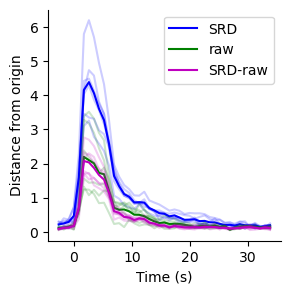

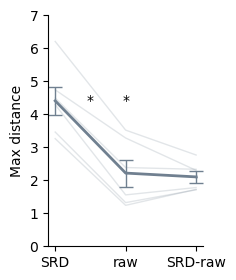

In [54]:
color_list = ['b','g','m']
xx = np.linspace(-3,39,43)/(15/13)
label_list = ['SRD','raw','SRD-raw']
plt.figure(figsize = (3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
max_list = []
for j in range(3):
    for ii in range(3):
        aa = np.squeeze(data_all[j,:,ii,odor_selected,:])
        for k in range(2):
            plt.plot(xx,aa[k,:],color = color_list[j],alpha = 0.2)
    data_selected = np.squeeze(data_all[j,:,:,odor_selected,:])
    data_selected = data_selected.reshape((-1,43))
    the_max = np.max(data_selected,1)
    max_list.append(the_max)
    data_selected_mean = np.mean(data_selected,0)
    plt.plot(xx,data_selected_mean,color = color_list[j],label = label_list[j])
    plt.xlabel('Time (s)')
    plt.ylabel('Distance from origin')
    plt.legend()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.savefig(data_path+'/distance_from_origin'+'.pdf',bbox_inches = 'tight')
plt.savefig(data_path+'/distance_from_origin'+'.png',bbox_inches = 'tight')
plt.show()
plot_bar(max_list,color_list,True,data_path+'/max_distance',label_list,'Max distance',(0,7),True,True)